In [1]:
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Make the notebook automatically reload external python modules
%load_ext autoreload
%autoreload 2
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Function for ploting the decision boundaries of a model
# You will use it later
def plot_decision_regions(X, y, classifier, resolution=0.01):

    # setup marker generator and color map
    markers = ('.', '.')
    colors = ('blue', 'red')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

## Reading the data

In [3]:
training_set = pd.read_csv('training_set.csv')
test_set = pd.read_csv('test_set.csv')
X_training, y_training = training_set[['x1', 'x2']].values, training_set['y'].values
X_test, y_test = test_set[['x1', 'x2']].values, test_set['y'].values

## Visualizing the data

Plot the following graphs for the training set:

For the first feature only:
1. For the first 1000 data points plot a histogram for each class on the same graph (use bins=20, alpha=0.5).
1. For all the data points plot a histogram for each class on the same graph (use bins=40, alpha=0.5).

For both features:
1. For the first 1000 data points plot a scatter plot where each class has different color
1. For all the data points plot a scatter plot where each class has different color

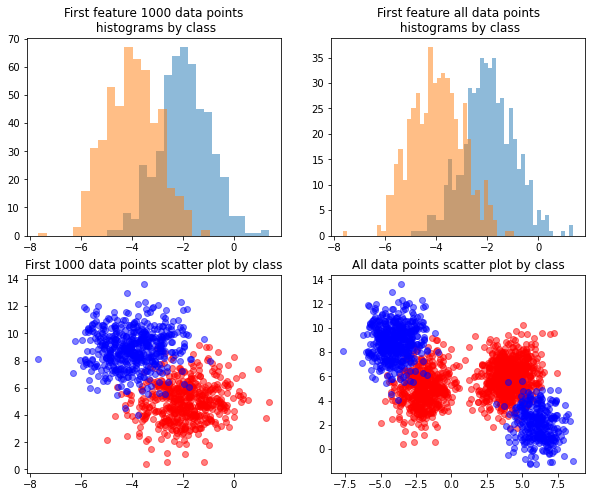

In [4]:
data_1000 = np.column_stack((X_training[0:1000], y_training[0:1000]))

class0_1000 = data_1000[data_1000[:, -1] == 0]
class1_1000 = data_1000[data_1000[:, -1] == 1]

data = np.column_stack((X_training, y_training))

class0 = data[data[:, -1] == 0]
class1 = data[data[:, -1] == 1]

fig, axs = plt.subplots(2, 2)
axs[0, 0].set_title("First feature 1000 data points\n histograms by class")
axs[0, 0].hist(class0_1000[:, 0], bins=20, alpha=0.5)
axs[0, 0].hist(class1_1000[:, 0], bins=20, alpha=0.5)

axs[0, 1].set_title("First feature all data points\n histograms by class")
axs[0, 1].hist(class0_1000[:, 0], bins=40, alpha=0.5)
axs[0, 1].hist(class1_1000[:, 0], bins=40, alpha=0.5)

axs[1, 0].set_title("First 1000 data points scatter plot by class")
axs[1, 0].plot(class0_1000[:, 0], class0_1000[:, 1], 'ro', alpha=0.5)
axs[1, 0].plot(class1_1000[:, 0], class1_1000[:, 1], 'bo', alpha=0.5)

axs[1, 1].set_title("All data points scatter plot by class")
axs[1, 1].plot(class0[:, 0], class0[:, 1], 'ro', alpha=0.5)
axs[1, 1].plot(class1[:, 0], class1[:, 1], 'bo', alpha=0.5)

## Logistic Regression


Implement the Logistic Regression algorithm that uses gradient descent for finding the optimal theta vector. 

Where:
$$
h_\theta(x) = \frac{1}{1 + e^{-\theta^T x}}
$$

$$
J(\theta)=\frac{1}{m} \sum_{d=1}^{m} - y^{(d)}ln(h_\theta(x^{(d)}) - (1 - y^{(d)})ln(1 - h_\theta(x^{(d)})
$$

Your class should contain the following functions:
1. fit - the learning function
1. predict - the function for predicting an instance after the fit function was executed

\* You can add more functions if you think this is necessary

Your model should also store a list of the costs that you've calculated in each iteration

In [5]:
class LogisticRegressionGD(object):
    """
    Logistic Regression Classifier using gradient descent.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    eps : float
      minimal change in the cost to declare convergence
    random_state : int
      Random number generator seed for random weight
      initialization.
    """

    def __init__(self, eta=0.00005, n_iter=10000, eps=0.000001, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.eps = eps
        np.random.seed(random_state)
        self.J_history = []

    def fit(self, X, y):
        """ 
        Fit training data (the learning phase).
        Updating the theta vector in each iteration using gradient descent.
        Store the theta vector in an attribute of the LogisticRegressionGD object.
        Stop the function when the difference between the previous cost and the current is less than eps
        or when you reach n_iter.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.
        """

        prev_cost = 1e200
        X = self.add_bias(X)
        self.theta = np.random.random(size=X.shape[1])
        for _ in range(self.n_iter):
            h_values = self.sigmoid(X)
            sigma = X.T.dot(h_values - y)
            self.theta -= (self.eta * sigma)
            cost = self.cost(X, y)
            self.J_history.append(cost)
            diff = np.absolute(prev_cost - self.J_history[-1])
            if diff < self.eps:
                break
            prev_cost = self.J_history[-1]

    def predict(self, X):
        """Return the predicted class label"""

        return (self.sigmoid(self.add_bias(X)) > 0.5).astype(int)

    def sigmoid(self, X):
        return 1 / (1 + np.exp(-1 * np.dot(X, self.theta)))

    def add_bias(self, X):
        return np.column_stack((np.ones(X.shape[0]), X))

    def cost(self, X, y):
        h_X = self.sigmoid(X)
        return -1 * (1 / X.shape[0]) * np.sum((y * np.log(h_X + 1.23e-260)) + (1 - y) * np.log(1 - h_X + 1.23e-260))

    def get_accuracy(self, X, y):
        return np.sum(np.where(self.predict(X) == y, np.ones(X.shape[0]), 0)) / X.shape[0]

## Cross Validation


Use 5-fold cross validation in order to find the best eps and eta params from the given lists.

Shuffle the training set before you split the data to the folds.

In [6]:
etas = [0.05, 0.005, 0.0005, 0.00005, 0.000005]
epss = [0.01, 0.001, 0.0001, 0.00001, 0.000001]
num_folds = 5

sheffled_df = training_set.sample(frac=1)
X, y = sheffled_df[['x1', 'x2']].values, sheffled_df['y'].values
X_folds = np.array_split(X, num_folds)
y_folds = np.array_split(y, num_folds)
max_accuracy = 0

for eta in etas:
    for eps in epss:
        accuracy_sum = 0
        for i in range(num_folds):
            X_training_folds = np.concatenate(X_folds[:i] + X_folds[i + 1:])
            y_training_folds = np.concatenate(y_folds[:i] + y_folds[i + 1:])
            validation_fold = [X_folds[i], y_folds[i]]

            logistic_model = LogisticRegressionGD(eta=eta, eps=eps)
            logistic_model.fit(X_training_folds, y_training_folds)

            prediction = logistic_model.predict(validation_fold[0])

            accuracy_sum += 1 - (np.sum(np.abs(prediction - validation_fold[1])) / len(validation_fold[1]))

        if accuracy_sum / num_folds > max_accuracy:
            max_accuracy = accuracy_sum / num_folds
            best_eta = eta
            best_eps = eps

In [7]:
print("best ets: ", best_eta)
print("best eps: ", best_eps)

best ets:  5e-05
best eps:  1e-06


## Normal distribution pdf


Implement the normal distribution pdf 
$$
f(x;\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\big{(}\frac{x-\mu}{\sigma}\big{)}^2}
$$
Write an efficient vectorized code

In [8]:
def norm_pdf(data, mu, sigma):
    frac = 1 / sigma * np.sqrt(2 * np.pi)
    power = (-1 / 2) * np.square((data - mu) / sigma)
    return frac * np.exp(power)

## Expectation Maximization


Implement the Expectation Maximization algorithm for gaussian mixture model.

The class should hold the distribution params.

Use -log likelihood as the cost function:
$$
cost(x) = \sum_{d=1}^{m}-log(w * pdf(x; \mu, \sigma))
$$

\* The above is the cost of one gaussian. Think how to use the cost function for gaussian mixture.

Your class should contain the following functions:
1. init_params - initialize distribution params
1. expectation - calculating responsibilities
1. maximization - updating distribution params
1. fit - the learning function
1. get_dist_params - return the distribution params

\* You can add more functions if you think this is necessary

Don't change the eps params (eps=0.01)

When you need to calculate the pdf of a normal distribution use the function `norm_pdf` that you implemented above.

In [9]:
class EM(object):
    """
    Naive Bayes Classifier using Gauusian Mixture Model (EM) for calculating the likelihood.

    Parameters
    ------------
    k : int
      Number of gaussians in each dimension
    n_iter : int
      Passes over the training dataset in the EM proccess
    eps: float
      minimal change in the cost to declare convergence
    random_state : int
      Random number generator seed for random params initialization.
    """

    def __init__(self, k=1, n_iter=1000, eps=0.01, random_state=1):
        self.k = k
        self.n_iter = n_iter
        self.eps = eps
        self.J_history = []
        np.random.seed(random_state)

    def init_params(self, data):
        """
        Initialize distribution params
        """

        self.weights = np.random.random(self.k)
        self.weights = self.weights / np.sum(self.weights)
        means_init = np.empty(self.k, )
        stds_init = np.empty(self.k, )
        data_split = []
        data = np.sort(data)
        indices = np.arange(data.shape[0] / self.k)
        for i in range(self.k):
            indices = indices + (i * data.shape[0] / self.k)
            indices = indices.astype(int)
            data_split.append(data[indices])
            means_init[i] = np.mean(np.array(data_split[i]))
            stds_init[i] = np.std(np.array(data_split[i]))
        self.means = means_init
        self.stds = stds_init

    def expectation(self, data):
        """
        E step - calculating responsibilities
        """

        self.probabilities = np.empty([self.k, data.shape[0]])
        for i in range(len(self.probabilities)):
            self.probabilities[i] = self.weights[i] * norm_pdf(data, self.means[i], self.stds[i])
        self.resp = self.probabilities / (np.sum(self.probabilities, axis=0))

    def maximization(self, data):
        """
        M step - updating distribution params
        """

        self.weights = np.sum(self.resp, axis=1) / data.shape[0]
        for i in range(self.k):
            self.means[i] = np.dot(self.resp[i], data) / np.sum(self.resp[i])
            self.stds[i] = np.sqrt(np.dot(self.resp[i], np.square(data - self.means[i])) / (np.sum(self.resp[i])))

    def fit(self, data):
        """ 
        Fit training data (the learning phase).
        Use init_params and then expectation and maximization function in order to find params 
        for the distribution. 
        Store the params in attributes of the EM object.
        Stop the function when the difference between the previous cost and the current is less than eps
        or when you reach n_iter.
        """

        self.init_params(data)
        prev = 1e200
        for _ in range(self.n_iter):
            self.expectation(data)
            self.maximization(data)
            cost = self.cost(data)
            self.J_history.append(cost)
            if np.absolute(prev - cost) < self.eps:
                break
            prev = cost

    def get_dist_params(self):
        return self.weights, self.means, self.stds

    def cost(self, data):
        return np.sum(-np.log(np.sum(self.probabilities, axis=0)))

## Naive Bayes


Implement the Naive Bayes algorithm.

For calculating the likelihood use the EM algorithm that you implemented above to find the distribution params. With these params you can calculate the likelihood probability.

Calculate the prior probability directly from the training set.

Your class should contain the following functions:
1. fit - the learning function
1. predict - the function for predicting an instance (or instances) after the fit function was executed

\* You can add more functions if you think this is necessary


In [10]:
class NaiveBayesGaussian(object):
    """
    Naive Bayes Classifier using Gauusian Mixture Model (EM) for calculating the likelihood.

    Parameters
    ------------
    k : int
      Number of gaussians in each dimension
    random_state : int
      Random number generator seed for random params initialization.
    """

    def __init__(self, k=1, random_state=1):
        self.k = k
        self.random_state = random_state

    def fit(self, X, y):
        """ 
        Fit training data.

        Parameters
        ----------
        X : array-like, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.
        """

        self.classes, self.classes_prior = np.unique(y, return_counts=True)
        self.classes_prior = self.classes_prior / X.shape[0]
        num_of_features = X.shape[1]
        num_of_classes = self.classes.shape[0]
        self.weights = np.empty([num_of_classes, num_of_features, self.k])
        self.means = np.empty([num_of_classes, num_of_features, self.k])
        self.stds = np.empty([num_of_classes, num_of_features, self.k])
        X = np.column_stack([X, y])
        for i in range(num_of_classes):
            for j in range(num_of_features):
                current_data = X[X[:, -1] == self.classes[i]][:, j]
                em = EM(self.k, self.random_state)
                em.fit(current_data)
                self.weights[i][j], self.means[i][j], self.stds[i][j] = em.get_dist_params()

    def predict(self, X):
        """Return the predicted class label"""

        predictions = np.empty([self.classes.shape[0], X.shape[0]])
        for class_value in range(self.classes.shape[0]):
            prior = self.classes_prior[class_value]
            likelihood = self.get_likelihood(X, class_value)
            predictions[class_value] = prior * likelihood
        predictions = predictions[0] < predictions[1]
        return predictions.astype(int)

    def get_accuracy(self, test_set, real_data):
        predictions = self.predict(test_set)
        accuracy = predictions == real_data
        accuracy = accuracy.astype(int)
        return np.sum(accuracy) / accuracy.shape[0]

    def get_likelihood(self, X, class_value):
        likelihood = 1
        for i in range(self.means.shape[1]):
            prob = 0
            for j in range(self.k):
                prob += self.weights[class_value][i][j] * norm_pdf(X[:, i], self.means[class_value][i][j],
                                                                   self.stds[class_value][i][j])
            likelihood *= prob
        return likelihood

## Model evaluation


In this section you will build 2 models and fit them to 2 datasets

First 1000 training points and first 500 test points:
1. Use the first 1000 points from the training set (take the first original 1000 points - before the shuffle) and the first 500 points from the test set.
1. Fit Logistic Regression model with the best params you found earlier.
1. Fit Naive Bayes model. Remember that you need to select the number of gaussians in the EM.
1. Print the training and test accuracies for each model.
1. Use the `plot_decision_regions` function to plot the decision boundaries for each model (for this you need to use the training set as the input)
1. Plot the cost Vs the iteration number for the Logistic Regression model

Use all the training set points:
1. Repeat sections 2-6 for all the training set points

In [11]:
def model_evaluation(X_train, y_train, X_test, y_test):
    logistic = LogisticRegressionGD(eta=best_eta, eps=best_eps)
    logistic.fit(X_train, y_train)
    bayes = NaiveBayesGaussian(k=2)
    bayes.fit(X_train, y_train)

    l_counter = 0
    b_counter = 0

    l_pred = logistic.predict(X_train)
    b_pred = bayes.predict(X_train)
    y_len = len(y_train)
    for i in range(y_len):
        if l_pred[i] == y_train[i]:
            l_counter += 1
        if b_pred[i] == y_train[i]:
            b_counter += 1
    print("LogisticRegression training accuracy:", l_counter * 100 / y_len)
    print("NaiveBayes training accuracy", b_counter * 100 / y_len)

    l_counter = 0
    b_counter = 0

    l_pred = logistic.predict(X_test)
    b_pred = bayes.predict(X_test)
    y_len = len(y_test)
    for i in range(y_len):
        if l_pred[i] == y_test[i]:
            l_counter += 1
        if b_pred[i] == y_test[i]:
            b_counter += 1

    print("LogisticRegression test accuracy:", l_counter * 100 / y_len)
    print("NaiveBayes test accuracy", b_counter * 100 / y_len)

    plot_decision_regions(X_train[:1000], y_train[:1000], logistic)
    plot_decision_regions(X_train[:1000], y_train[:1000], bayes)
    plt.figure(2)
    plt.plot(np.arange(len(logistic.J_history)), logistic.J_history)
    plt.xscale('log')
    plt.xlabel('Iterations')
    plt.ylabel('cost')
    plt.title('Loss as a function of iterations')
    plt.show()

First 1000 training points and first 500 test points:
LogisticRegression training accuracy: 96.5
NaiveBayes training accuracy 96.8
LogisticRegression test accuracy: 93.8
NaiveBayes test accuracy 94.4


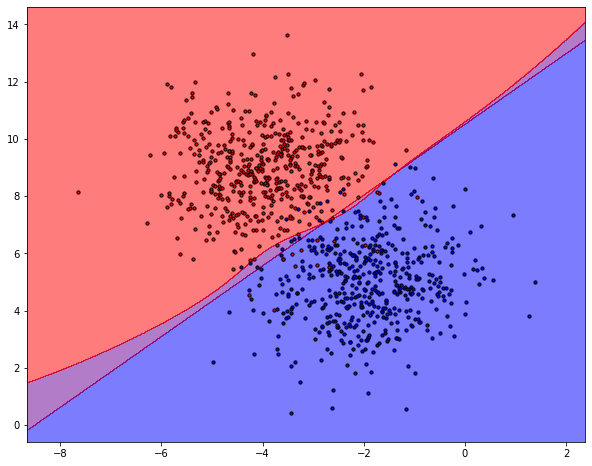

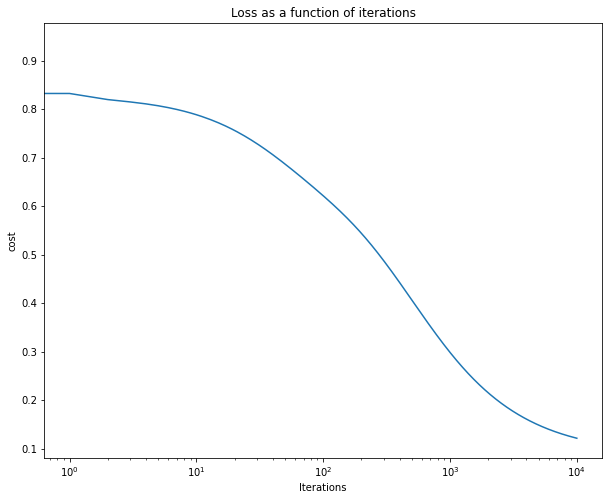

In [12]:
print("First 1000 training points and first 500 test points:")
model_evaluation(X_training[:1000], y_training[:1000], X_test[:500], y_test[:500])

All data points:
LogisticRegression training accuracy: 80.9
NaiveBayes training accuracy 90.3
LogisticRegression test accuracy: 80.4
NaiveBayes test accuracy 89.0


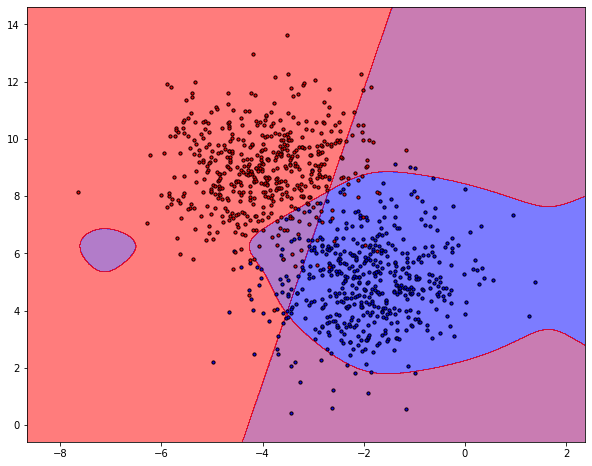

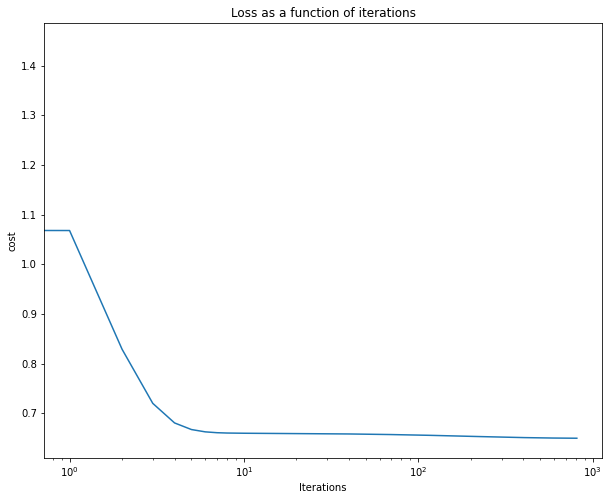

In [13]:
print("All data points:")
model_evaluation(X_training, y_training, X_test, y_test)

## Open question


Will Full Bayes get better results comparing to Naive Bayes on the following dataset? Explain. 

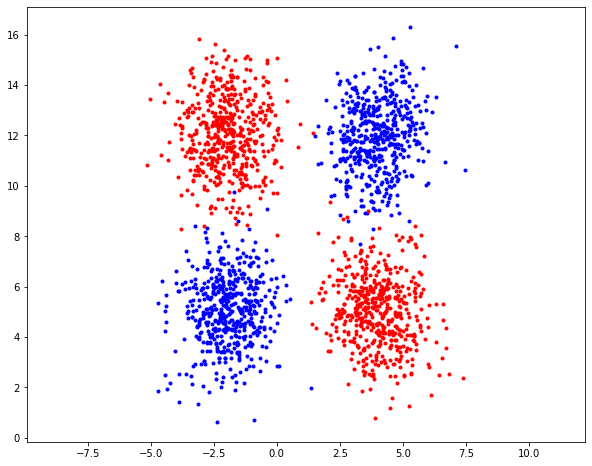

In [14]:
mean = [[-2,5], [-2, 12], [4, 12], [4, 5]]
cov = [[[1,0.2],[0.2,2]], [[1,0],[0,2]], [[1,0.2],[0.2,2]], [[1,-0.2],[-0.2,2]]]
x1 = []
x2 = []
y = []
size = [500, 500, 500, 500]
c = ['b', 'r']
for i in range(4):
    xx1,xx2 = np.random.multivariate_normal(mean[i],cov[i],size[i]).T
    x1.extend(xx1)
    x2.extend(xx2)
    y.extend([i%2] * size[i])
    plt.scatter(xx1,xx2, marker='.', c=c[i%2])
plt.axis('equal')
plt.show()

No, because there is no single line that can seperate the datasets.